In [1]:
import pandas as pd

# Rutas de tus archivos
path_base = "C:/Users/maria/Desktop/sexto/ml-latest-small/"

# Leer cada archivo
links_df = pd.read_csv(path_base + "links.csv")
movies_df = pd.read_csv(path_base + "movies.csv")
ratings_df = pd.read_csv(path_base + "ratings.csv")
tags_df = pd.read_csv(path_base + "tags.csv")

# Verificar que se cargaron correctamente
print("Links:")
print(links_df.head(), "\n")

print("Movies:")
print(movies_df.head(), "\n")

print("Ratings:")
print(ratings_df.head(), "\n")

print("Tags:")
print(tags_df.head())

Links:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0 

Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   

Ratings:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50 

In [2]:
print("Links shape:", links_df.shape)
print("Movies shape:", movies_df.shape)
print("Ratings shape:", ratings_df.shape)
print("Tags shape:", tags_df.shape)

print("\nColumns in each dataset:")
print("Links:", links_df.columns.tolist())
print("Movies:", movies_df.columns.tolist())
print("Ratings:", ratings_df.columns.tolist())
print("Tags:", tags_df.columns.tolist())


Links shape: (9742, 3)
Movies shape: (9742, 3)
Ratings shape: (100836, 4)
Tags shape: (3683, 4)

Columns in each dataset:
Links: ['movieId', 'imdbId', 'tmdbId']
Movies: ['movieId', 'title', 'genres']
Ratings: ['userId', 'movieId', 'rating', 'timestamp']
Tags: ['userId', 'movieId', 'tag', 'timestamp']


In [3]:
print("\nNull values:")
print("Links:\n", links_df.isnull().sum())
print("Movies:\n", movies_df.isnull().sum())
print("Ratings:\n", ratings_df.isnull().sum())
print("Tags:\n", tags_df.isnull().sum())

print("\nData types:")
print("Movies:\n", movies_df.dtypes)



Null values:
Links:
 movieId    0
imdbId     0
tmdbId     8
dtype: int64
Movies:
 movieId    0
title      0
genres     0
dtype: int64
Ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Tags:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Data types:
Movies:
 movieId     int64
title      object
genres     object
dtype: object



Ratings summary:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


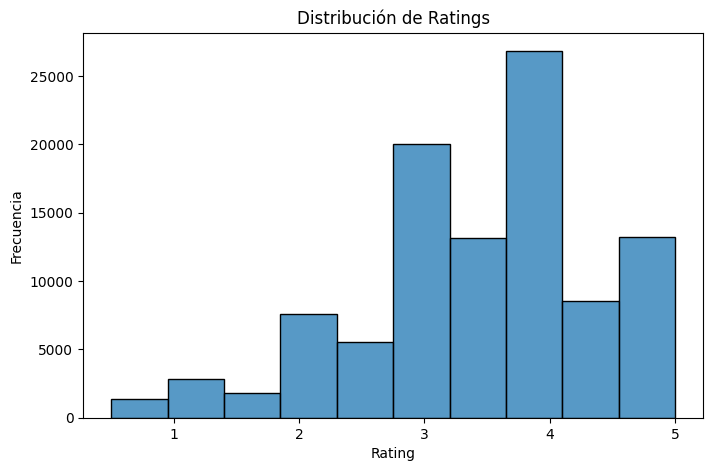

In [4]:
print("\nRatings summary:")
print(ratings_df['rating'].describe())

# Distribución de ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(ratings_df['rating'], bins=10, kde=False)
plt.title("Distribución de Ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()


In [5]:
# Contar número de ratings por película
rating_counts = ratings_df.groupby('movieId')['rating'].count().reset_index()
rating_counts.columns = ['movieId', 'rating_count']

# Promedio de rating por película
rating_means = ratings_df.groupby('movieId')['rating'].mean().reset_index()
rating_means.columns = ['movieId', 'avg_rating']

# Unir con el DataFrame de películas
movie_stats = movies_df.merge(rating_counts, on='movieId').merge(rating_means, on='movieId')

# Top 10 más valoradas (con al menos 50 ratings)
top_rated = movie_stats[movie_stats['rating_count'] >= 50].sort_values(by='avg_rating', ascending=False)

print("\nTop 10 películas mejor valoradas:")
print(top_rated[['title', 'avg_rating', 'rating_count']].head(10))



Top 10 películas mejor valoradas:
                                                  title  avg_rating  \
277                    Shawshank Redemption, The (1994)    4.429022   
659                               Godfather, The (1972)    4.289062   
2224                                  Fight Club (1999)    4.272936   
974                               Cool Hand Luke (1967)    4.271930   
602   Dr. Strangelove or: How I Learned to Stop Worr...    4.268041   
686                                  Rear Window (1954)    4.261905   
921                      Godfather: Part II, The (1974)    4.259690   
6298                               Departed, The (2006)    4.252336   
913                                   Goodfellas (1990)    4.250000   
694                                   Casablanca (1942)    4.240000   

      rating_count  
277            317  
659            192  
2224           218  
974             57  
602             97  
686             84  
921            129  
6298           


Géneros más comunes:
Drama: 4361
Comedy: 3756
Thriller: 1894
Action: 1828
Romance: 1596
Adventure: 1263
Crime: 1199
Sci-Fi: 980
Horror: 978
Fantasy: 779


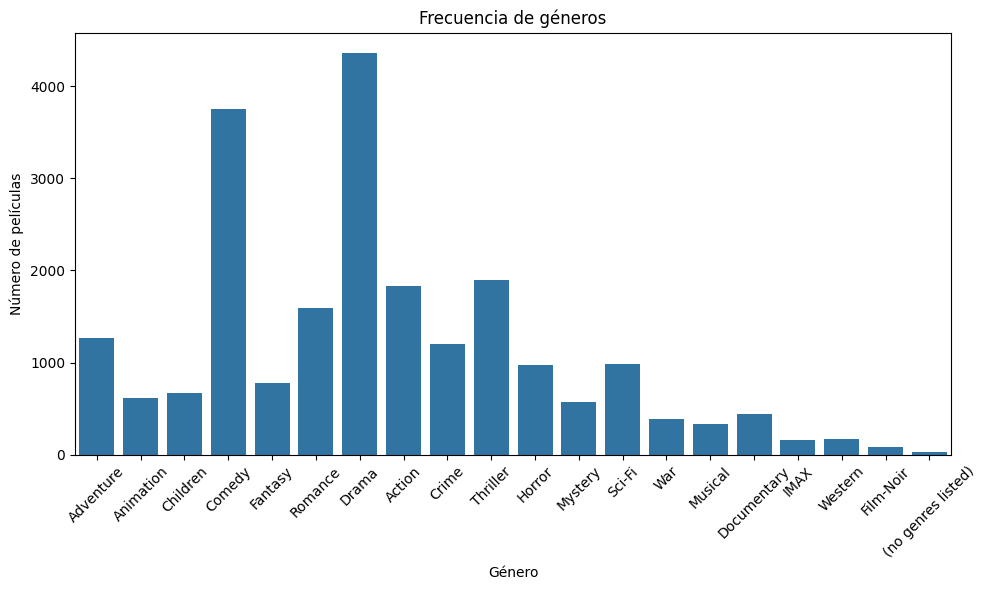

In [6]:
# Separar los géneros
from collections import Counter

genres = movies_df['genres'].str.split('|').sum()
genre_counts = Counter(genres)

# Mostrar top géneros
print("\nGéneros más comunes:")
for genre, count in genre_counts.most_common(10):
    print(f"{genre}: {count}")

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=45)
plt.title("Frecuencia de géneros")
plt.xlabel("Género")
plt.ylabel("Número de películas")
plt.tight_layout()
plt.show()
